In [1]:
import pandas as pd
import numpy as np
import tweepy
import yfinance as yf
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime, timedelta

In [3]:
import pandas as pd
stock_data = pd.read_csv('stock_data.csv', parse_dates=['date'])
tweet_data = pd.read_csv('tweet_data.csv', parse_dates=['date'])
print(stock_data.head())
print(tweet_data.head())


        date    Adj Close  Adj Close.1  Adj Close.2        Close      Close.1  \
0        NaT         AAPL         GOOG         MSFT         AAPL         GOOG   
1 2023-01-03  123.7684631  89.37885284  235.7117157  125.0699997  89.69999695   
2 2023-01-04  125.0450439  88.39240265  225.4009399  126.3600006  88.70999908   
3 2023-01-05  123.7189789  86.45934296  218.7205505  125.0199966  86.76999664   
4 2023-01-06  128.2711334  87.84436798  221.2982483  129.6199951  88.16000366   

       Close.2         High       High.1       High.2          Low  \
0         MSFT         AAPL         GOOG         MSFT         AAPL   
1  239.5800018  130.8999939  91.55000305       245.75  124.1699982   
2  229.1000061  128.6600037  91.23999786  232.8699951  125.0800018   
3  222.3099976  127.7699966  88.20999908  227.5500031  124.7600021   
4  224.9299927  130.2899933  88.47000122  225.7599945  124.8899994   

         Low.1        Low.2         Open       Open.1       Open.2     Volume  \
0         G

In [4]:
stock_data

,date,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
0,NaT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT
1,2023-01-03,123.7684631,89.37885284,235.7117157,125.0699997,89.69999695,239.5800018,130.8999939,91.55000305,245.75,124.1699982,89.01999664,237.3999939,130.2799988,89.83000183,243.0800018,112117500,20738500,25740000
2,2023-01-04,125.0450439,88.39240265,225.4009399,126.3600006,88.70999908,229.1000061,128.6600037,91.23999786,232.8699951,125.0800018,87.80000305,225.9600067,126.8899994,91.01000214,232.2799988,89113600,27046500,50623400
3,2023-01-05,123.7189789,86.45934296,218.7205505,125.0199966,86.76999664,222.3099976,127.7699966,88.20999908,227.5500031,124.7600021,86.55999756,221.7599945,127.1299973,88.06999969,227.1999969,80962700,23136100,39585600
4,2023-01-06,128.2711334,87.84436798,221.2982483,129.6199951,88.16000366,224.9299927,130.2899933,88.47000122,225.7599945,124.8899994,85.56999969,219.3500061,126.0100021,87.36000061,223,87754700,26612600,43613600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2024-12-09,246.75,177.1000061,446.019989,246.75,177.1000061,446.019989,247.2400055,178.0399933,448.3299866,241.75,175.3999939,440.5,241.8300018,175.7149963,442.6000061,44649200,19887800,19144400
488,2024-12-10,247.7700043,186.5299988,443.3299866,247.7700043,186.5299988,443.3299866,248.2100067,188.0299988,449.6199951,245.3399963,182.6699982,441.6000061,246.8899994,184.5350037,444.3900146,36914800,34317400,18469500
489,2024-12-11,246.4900055,196.7100067,448.9899902,246.4900055,196.7100067,448.9899902,250.8000031,196.8899994,450.3500061,246.2599945,186.2599945,444.0499878,247.9600067,186.6999969,444.0499878,45205800,41664500,19200200
490,2024-12-12,247.9600067,193.6300049,449.5599976,247.9600067,193.6300049,449.5599976,248.7400055,196.7050018,456.1600037,245.6799927,193.2799988,449.1099854,246.8899994,196.3000031,449.1099854,32777500,25197800,20834800


In [5]:
print(stock_data.columns)

Index(['date', 'Adj Close', 'Adj Close.1', 'Adj Close.2', 'Close', 'Close.1',
       'Close.2', 'High', 'High.1', 'High.2', 'Low', 'Low.1', 'Low.2', 'Open',
       'Open.1', 'Open.2', 'Volume', 'Volume.1', 'Volume.2'],
      dtype='object')


In [6]:
stock_data

,date,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
0,NaT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT
1,2023-01-03,123.7684631,89.37885284,235.7117157,125.0699997,89.69999695,239.5800018,130.8999939,91.55000305,245.75,124.1699982,89.01999664,237.3999939,130.2799988,89.83000183,243.0800018,112117500,20738500,25740000
2,2023-01-04,125.0450439,88.39240265,225.4009399,126.3600006,88.70999908,229.1000061,128.6600037,91.23999786,232.8699951,125.0800018,87.80000305,225.9600067,126.8899994,91.01000214,232.2799988,89113600,27046500,50623400
3,2023-01-05,123.7189789,86.45934296,218.7205505,125.0199966,86.76999664,222.3099976,127.7699966,88.20999908,227.5500031,124.7600021,86.55999756,221.7599945,127.1299973,88.06999969,227.1999969,80962700,23136100,39585600
4,2023-01-06,128.2711334,87.84436798,221.2982483,129.6199951,88.16000366,224.9299927,130.2899933,88.47000122,225.7599945,124.8899994,85.56999969,219.3500061,126.0100021,87.36000061,223,87754700,26612600,43613600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2024-12-09,246.75,177.1000061,446.019989,246.75,177.1000061,446.019989,247.2400055,178.0399933,448.3299866,241.75,175.3999939,440.5,241.8300018,175.7149963,442.6000061,44649200,19887800,19144400
488,2024-12-10,247.7700043,186.5299988,443.3299866,247.7700043,186.5299988,443.3299866,248.2100067,188.0299988,449.6199951,245.3399963,182.6699982,441.6000061,246.8899994,184.5350037,444.3900146,36914800,34317400,18469500
489,2024-12-11,246.4900055,196.7100067,448.9899902,246.4900055,196.7100067,448.9899902,250.8000031,196.8899994,450.3500061,246.2599945,186.2599945,444.0499878,247.9600067,186.6999969,444.0499878,45205800,41664500,19200200
490,2024-12-12,247.9600067,193.6300049,449.5599976,247.9600067,193.6300049,449.5599976,248.7400055,196.7050018,456.1600037,245.6799927,193.2799988,449.1099854,246.8899994,196.3000031,449.1099854,32777500,25197800,20834800


In [7]:
tweet_data

,tweet_id,username,tweet_text,date,time,stock_symbol,polarity,subjectivity,signal
0,1,rkogazdv,"Huge growth potential in this stock, I’m buyin...",2024-11-30,8:05:00 PM,MSFT,0.341667,0.800000,Buy
1,2,qugzuntq,"Selling all my shares, this stock is going down!",2024-12-03,11:52:00 PM,AAPL,-0.194444,0.288889,Sell
2,3,tycfuoya,"No big updates for this company, market seems ...",2024-12-04,2:42:00 AM,TSLA,0.000000,0.100000,Hold
3,4,gopepigq,Market analysts are bearish on this stock!,2024-11-28,8:30:00 AM,GOOGL,0.000000,0.000000,Hold
4,5,lkoqwzwb,"I love the new product release, this will be b...",2024-12-14,7:04:00 PM,GOOGL,0.212121,0.384848,Buy
...,...,...,...,...,...,...,...,...,...
995,996,nznplodp,Market analysts are bearish on this stock!,2024-11-22,8:28:00 AM,AAPL,0.000000,0.000000,Hold
996,997,rytqgwkw,"Company has announced a new product line, mixe...",2024-12-09,3:29:00 PM,GOOGL,0.068182,0.352273,Buy
997,998,kkdwcrum,"Major issues in the company, this stock is doo...",2024-11-27,12:05:00 PM,AAPL,0.062500,0.500000,Buy
998,999,whigchth,"No big updates for this company, market seems ...",2024-12-08,1:56:00 PM,TSLA,0.000000,0.100000,Hold


In [69]:
merged_data = pd.merge(stock_data, tweet_data[['date', 'polarity']], on='date', how='left')

In [70]:
merged_data

,date,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2,polarity
0,NaT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,NaN
1,2023-01-03,123.7684631,89.37885284,235.7117157,125.0699997,89.69999695,239.5800018,130.8999939,91.55000305,245.75,124.1699982,89.01999664,237.3999939,130.2799988,89.83000183,243.0800018,112117500,20738500,25740000,NaN
2,2023-01-04,125.0450439,88.39240265,225.4009399,126.3600006,88.70999908,229.1000061,128.6600037,91.23999786,232.8699951,125.0800018,87.80000305,225.9600067,126.8899994,91.01000214,232.2799988,89113600,27046500,50623400,NaN
3,2023-01-05,123.7189789,86.45934296,218.7205505,125.0199966,86.76999664,222.3099976,127.7699966,88.20999908,227.5500031,124.7600021,86.55999756,221.7599945,127.1299973,88.06999969,227.1999969,80962700,23136100,39585600,NaN
4,2023-01-06,128.2711334,87.84436798,221.2982483,129.6199951,88.16000366,224.9299927,130.2899933,88.47000122,225.7599945,124.8899994,85.56999969,219.3500061,126.0100021,87.36000061,223,87754700,26612600,43613600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,2024-12-13,248.1300049,191.3800049,447.269989,248.1300049,191.3800049,447.269989,249.2899933,194.3399963,451.4299927,246.2400055,191.2599945,445.5799866,247.8200073,192.7100067,448.4400024,33132000,18866600,20172200,-0.194444
1095,2024-12-13,248.1300049,191.3800049,447.269989,248.1300049,191.3800049,447.269989,249.2899933,194.3399963,451.4299927,246.2400055,191.2599945,445.5799866,247.8200073,192.7100067,448.4400024,33132000,18866600,20172200,-0.194444
1096,2024-12-13,248.1300049,191.3800049,447.269989,248.1300049,191.3800049,447.269989,249.2899933,194.3399963,451.4299927,246.2400055,191.2599945,445.5799866,247.8200073,192.7100067,448.4400024,33132000,18866600,20172200,0.341667
1097,2024-12-13,248.1300049,191.3800049,447.269989,248.1300049,191.3800049,447.269989,249.2899933,194.3399963,451.4299927,246.2400055,191.2599945,445.5799866,247.8200073,192.7100067,448.4400024,33132000,18866600,20172200,-0.194444


In [71]:
merged_data['Close'] = pd.to_numeric(merged_data['Close'], errors='coerce')

In [72]:
print(merged_data['Close'].isnull().sum()) 

1


In [73]:
merged_data['Close'].fillna(method='ffill', inplace=True) 

C:\Users\Admin\AppData\Local\Temp\ipykernel_18312\27320330.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Close'].fillna(method='ffill', inplace=True)  # Forward fill missing values


In [74]:

merged_data['RSI'] = rsi(merged_data)


In [89]:
merged_data['Close'] = pd.to_numeric(merged_data['Close'], errors='coerce')
merged_data['Close'].fillna(method='ffill', inplace=True)

merged_data['RSI'] = rsi(merged_data)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18312\2125047240.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Close'].fillna(method='ffill', inplace=True)


In [90]:
def moving_average(data, window=14):
    return data['Close'].rolling(window=window).mean()

def rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

merged_data['moving_avg_10'] = moving_average(merged_data, 10)
merged_data['moving_avg_50'] = moving_average(merged_data, 50)
merged_data['RSI'] = rsi(merged_data)

In [91]:
print(merged_data.columns)

Index(['date', 'Adj Close', 'Adj Close.1', 'Adj Close.2', 'Close', 'Close.1',
       'Close.2', 'High', 'High.1', 'High.2', 'Low', 'Low.1', 'Low.2', 'Open',
       'Open.1', 'Open.2', 'Volume', 'Volume.1', 'Volume.2', 'polarity', 'RSI',
       'moving_avg_10', 'moving_avg_50'],
      dtype='object')


In [79]:
print(tweet_data.columns)

Index(['tweet_id', 'username', 'tweet_text', 'date', 'time', 'stock_symbol',
       'polarity', 'subjectivity', 'signal'],
      dtype='object')


In [92]:
merged_data

,date,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,...,Open,Open.1,Open.2,Volume,Volume.1,Volume.2,polarity,RSI,moving_avg_10,moving_avg_50
0,NaT,AAPL,GOOG,MSFT,NaN,GOOG,MSFT,AAPL,GOOG,MSFT,...,AAPL,GOOG,MSFT,AAPL,GOOG,MSFT,NaN,NaN,NaN,NaN
1,2023-01-03,123.7684631,89.37885284,235.7117157,125.070000,89.69999695,239.5800018,130.8999939,91.55000305,245.75,...,130.2799988,89.83000183,243.0800018,112117500,20738500,25740000,NaN,NaN,NaN,NaN
2,2023-01-04,125.0450439,88.39240265,225.4009399,126.360001,88.70999908,229.1000061,128.6600037,91.23999786,232.8699951,...,126.8899994,91.01000214,232.2799988,89113600,27046500,50623400,NaN,100.000000,NaN,NaN
3,2023-01-05,123.7189789,86.45934296,218.7205505,125.019997,86.76999664,222.3099976,127.7699966,88.20999908,227.5500031,...,127.1299973,88.06999969,227.1999969,80962700,23136100,39585600,NaN,49.049372,NaN,NaN
4,2023-01-06,128.2711334,87.84436798,221.2982483,129.619995,88.16000366,224.9299927,130.2899933,88.47000122,225.7599945,...,126.0100021,87.36000061,223,87754700,26612600,43613600,NaN,81.466067,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,2024-12-13,248.1300049,191.3800049,447.269989,248.130005,191.3800049,447.269989,249.2899933,194.3399963,451.4299927,...,247.8200073,192.7100067,448.4400024,33132000,18866600,20172200,-0.194444,NaN,248.130005,248.065406
1095,2024-12-13,248.1300049,191.3800049,447.269989,248.130005,191.3800049,447.269989,249.2899933,194.3399963,451.4299927,...,247.8200073,192.7100067,448.4400024,33132000,18866600,20172200,-0.194444,NaN,248.130005,248.068806
1096,2024-12-13,248.1300049,191.3800049,447.269989,248.130005,191.3800049,447.269989,249.2899933,194.3399963,451.4299927,...,247.8200073,192.7100067,448.4400024,33132000,18866600,20172200,0.341667,NaN,248.130005,248.072206
1097,2024-12-13,248.1300049,191.3800049,447.269989,248.130005,191.3800049,447.269989,249.2899933,194.3399963,451.4299927,...,247.8200073,192.7100067,448.4400024,33132000,18866600,20172200,-0.194444,NaN,248.130005,248.075605


In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
print(merged_data.columns)

Index(['date', 'Adj Close', 'Adj Close.1', 'Adj Close.2', 'Close', 'Close.1',
       'Close.2', 'High', 'High.1', 'High.2', 'Low', 'Low.1', 'Low.2', 'Open',
       'Open.1', 'Open.2', 'Volume', 'Volume.1', 'Volume.2', 'polarity', 'RSI',
       'moving_avg_10', 'moving_avg_50'],
      dtype='object')


In [93]:
scaler = MinMaxScaler()
merged_data[['polarity', 'RSI', 'moving_avg_10', 'moving_avg_50']] = scaler.fit_transform(merged_data[['polarity', 'RSI', 'moving_avg_10', 'moving_avg_50']])

In [94]:
merged_data.to_csv('sentiment_stock_signals.csv', index=False)

In [83]:
print(tweet_data.columns)

Index(['tweet_id', 'username', 'tweet_text', 'date', 'time', 'stock_symbol',
       'polarity', 'subjectivity', 'signal'],
      dtype='object')


In [84]:
print(merged_data.columns)


Index(['date', 'Adj Close', 'Adj Close.1', 'Adj Close.2', 'Close', 'Close.1',
       'Close.2', 'High', 'High.1', 'High.2', 'Low', 'Low.1', 'Low.2', 'Open',
       'Open.1', 'Open.2', 'Volume', 'Volume.1', 'Volume.2', 'polarity', 'RSI',
       'moving_avg_10', 'moving_avg_50'],
      dtype='object')


In [85]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
tweet_data['date'] = pd.to_datetime(tweet_data['date'])
merged_data = pd.merge(stock_data, tweet_data[['date', 'polarity']], on='date', how='left')
print(merged_data.columns)


Index(['date', 'Adj Close', 'Adj Close.1', 'Adj Close.2', 'Close', 'Close.1',
       'Close.2', 'High', 'High.1', 'High.2', 'Low', 'Low.1', 'Low.2', 'Open',
       'Open.1', 'Open.2', 'Volume', 'Volume.1', 'Volume.2', 'polarity'],
      dtype='object')


In [98]:
import numpy as np
if 'polarity' in merged_data.columns and 'RSI' in merged_data.columns:
    merged_data['buy_signal'] = np.where((merged_data['polarity'] > 0) & (merged_data['RSI'] < 30), 1, 0)
    merged_data['sell_signal'] = np.where((merged_data['polarity'] < 0) & (merged_data['RSI'] > 70), 1, 0)
else:
    print("One of the required columns (polarity, RSI) is missing.")


In [99]:
print(merged_data.columns) 


Index(['date', 'Adj Close', 'Adj Close.1', 'Adj Close.2', 'Close', 'Close.1',
       'Close.2', 'High', 'High.1', 'High.2', 'Low', 'Low.1', 'Low.2', 'Open',
       'Open.1', 'Open.2', 'Volume', 'Volume.1', 'Volume.2', 'polarity', 'RSI',
       'moving_avg_10', 'moving_avg_50', 'buy_signal', 'sell_signal'],
      dtype='object')


In [100]:
merged_data.rename(columns=lambda x: x.strip(), inplace=True)


In [101]:
print(merged_data[['polarity', 'RSI']].isnull().sum())


polarity    471
RSI         339
dtype: int64


In [102]:
merged_data['polarity'].fillna(0, inplace=True)  # Replace NaN with 0
merged_data['RSI'].fillna(50, inplace=True)  # Assume 50 as a neutral RSI


In [103]:
merged_data['buy_signal'] = np.where((merged_data['polarity'] > 0) & (merged_data['RSI'] < 30), 1, 0)
merged_data['sell_signal'] = np.where((merged_data['polarity'] < 0) & (merged_data['RSI'] > 70), 1, 0)


In [104]:
print(merged_data.dtypes)


date             datetime64[ns]
Adj Close                object
Adj Close.1              object
Adj Close.2              object
Close                   float64
Close.1                  object
Close.2                  object
High                     object
High.1                   object
High.2                   object
Low                      object
Low.1                    object
Low.2                    object
Open                     object
Open.1                   object
Open.2                   object
Volume                   object
Volume.1                 object
Volume.2                 object
polarity                float64
RSI                     float64
moving_avg_10           float64
moving_avg_50           float64
buy_signal                int32
sell_signal               int32
dtype: object


In [105]:
merged_data['RSI'] = pd.to_numeric(merged_data['RSI'], errors='coerce')
merged_data['polarity'] = pd.to_numeric(merged_data['polarity'], errors='coerce')


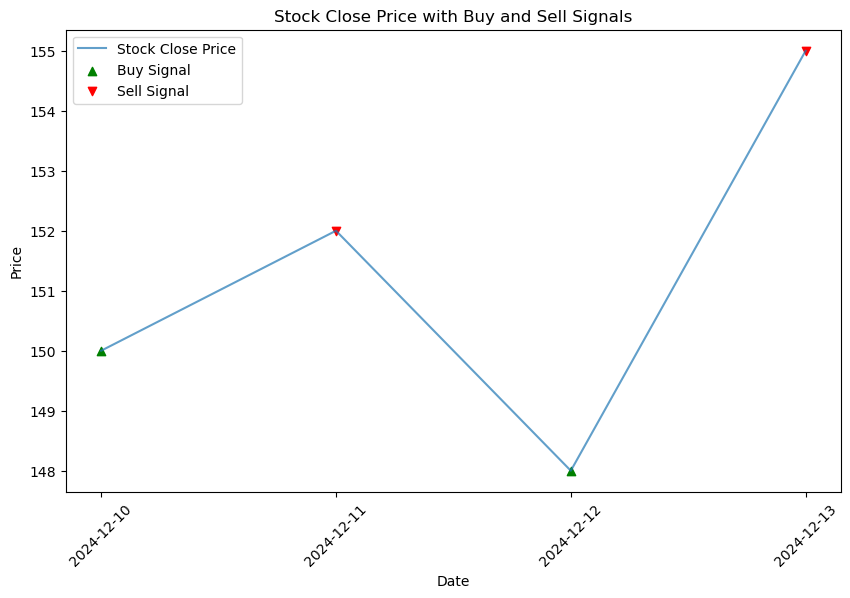

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

merged_data = pd.DataFrame({
    'date': ['2024-12-10', '2024-12-11', '2024-12-12', '2024-12-13'],
    'Close': [150, 152, 148, 155],
    'polarity': [0.3, -0.5, 0.7, -0.2],
    'RSI': [25, 75, 20, 85]
})

merged_data['polarity'] = pd.to_numeric(merged_data['polarity'], errors='coerce')
merged_data['RSI'] = pd.to_numeric(merged_data['RSI'], errors='coerce')

merged_data['buy_signal'] = np.where((merged_data['polarity'] > 0) & (merged_data['RSI'] < 30), 1, 0)
merged_data['sell_signal'] = np.where((merged_data['polarity'] < 0) & (merged_data['RSI'] > 70), 1, 0)

plt.figure(figsize=(10, 6))
plt.plot(merged_data['date'], merged_data['Close'], label='Stock Close Price', alpha=0.7)

plt.scatter(merged_data['date'][merged_data['buy_signal'] == 1], 
            merged_data['Close'][merged_data['buy_signal'] == 1], 
            marker='^', color='g', label='Buy Signal', alpha=1)

# Plot Sell signals
plt.scatter(merged_data['date'][merged_data['sell_signal'] == 1], 
            merged_data['Close'][merged_data['sell_signal'] == 1], 
            marker='v', color='r', label='Sell Signal', alpha=1)

plt.title('Stock Close Price with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
